<a href="https://colab.research.google.com/github/Himasishghosal/Control-Theory_And_ANN/blob/main/4_User_Friendly_TI_Control.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

>>>>>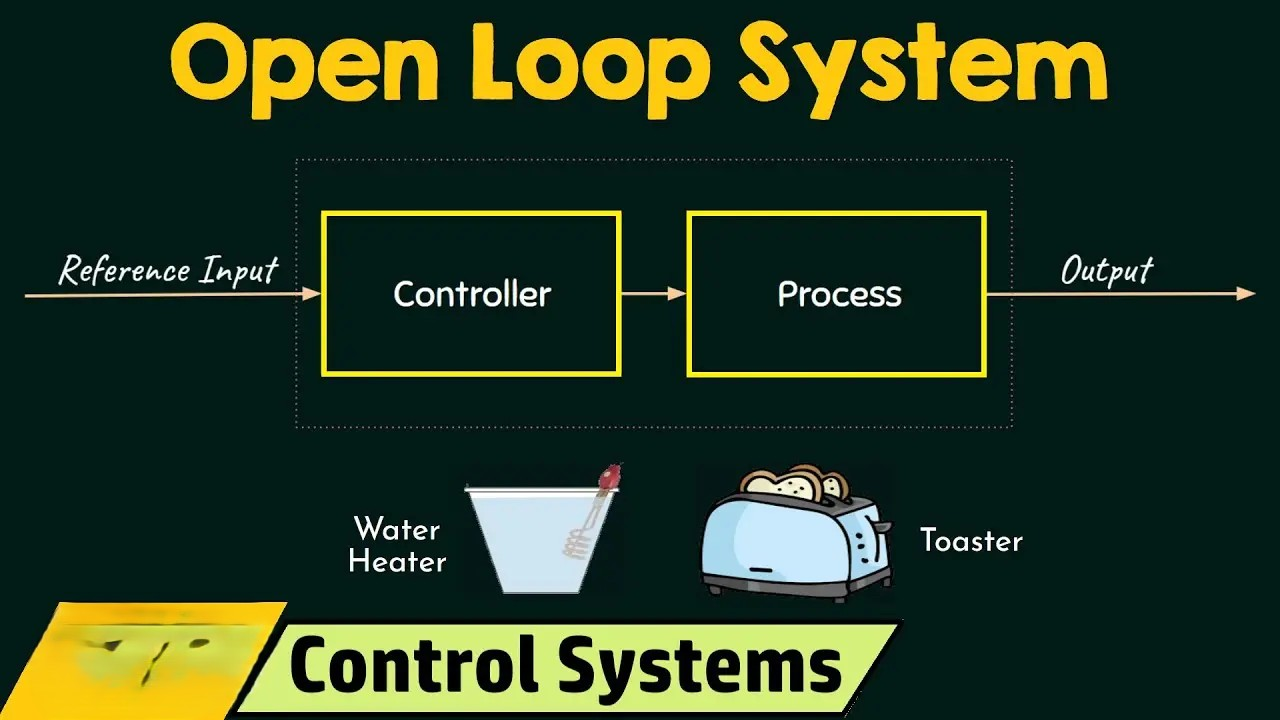

>>>>>>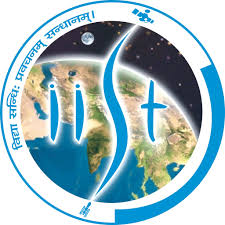

#     ***`User-Friendly Time-Invariant Control Simulation Tool`***

>#                                           `Presented By Himasish Ghosal`

>#                                            `Guided By Prof. Raju.k.George`

#**Objective:**
**To create an interactive and user-friendly Python tool that simulates the behavior of a time-invariant linear system using control theory. It numerically solves the system's dynamics with : user inputs and visualizes the state evolution over time.**

#**Key Libraries Used:**

1.   **NumPy: For array operations and numerical computations.**
2.   **SciPy: For solving ODEs (solve_ivp), computing matrix exponentials, and integrals.**
3.   **Matplotlib: For plotting state trajectories.**







#**Step-by-Step Workflow:**

#**1. Importing Required Libraries**


In [2]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt
from scipy.linalg import expm
from scipy.integrate import quad_vec

#**2. Taking User Input**

In [3]:
# To Get user input for T and N
try:
    T0 = int(input("Enter the initial time T0= "))
    T1 = int(input("Enter the final time T1= "))

    N = int(input("Enter the number of time points N = "))

    if T1 <= 0 or N <= 0:
        print("T1 and N must be positive values.")
    else:
        time_points = np.linspace(T0, T1, N)
        print(f"\nUsing T0 = {T0},T1={T1} and N = {N}")
        print(f"Generated {len(time_points)} time points.")

except ValueError:
    print("Invalid input. Please enter numerical values for T1 and N.")


Enter the initial time T0= 0
Enter the final time T1= 3
Enter the number of time points N = 100

Using T0 = 0,T1=3 and N = 100
Generated 100 time points.


In [4]:
# Get user input for n and m
try:
    n = int(input("Enter the state dimension (n): "))
    m = int(input("Enter the input dimension (m): "))

    if n <= 0 or m <= 0:
        print("n and m must be positive values.")
    else:
        print(f"\nUsing state dimension n = {n} and input dimension m = {m}")

except ValueError:
    print("Invalid input. Please enter numerical values for n and m.")

Enter the state dimension (n): 5
Enter the input dimension (m): 3

Using state dimension n = 5 and input dimension m = 3


#**3. Defining the System Dynamics**

In [5]:
# Get user input for matrix A
print(f"\nEnter the elements of matrix A ({n}x{n}):")
A = np.zeros((n, n))
try:
    for i in range(n):
        row = input(f"Enter row {i+1} (comma-separated values): ")
        A[i] = np.array([float(x) for x in row.split(',')])
except ValueError:
    print("Invalid input. Please enter numerical values separated by commas.")
except IndexError:
    print(f"Invalid input. Please enter exactly {n} values for each row.")

display(A)


Enter the elements of matrix A (5x5):
Enter row 1 (comma-separated values): 0,1,0,0,0
Enter row 2 (comma-separated values): 0,0,1,0,0
Enter row 3 (comma-separated values): 0,0,0,1,0
Enter row 4 (comma-separated values): 0,0,0,0,1
Enter row 5 (comma-separated values): -1,-2,-3,-4,-5


array([[ 0.,  1.,  0.,  0.,  0.],
       [ 0.,  0.,  1.,  0.,  0.],
       [ 0.,  0.,  0.,  1.,  0.],
       [ 0.,  0.,  0.,  0.,  1.],
       [-1., -2., -3., -4., -5.]])

In [6]:
# Get user input for matrix B
print(f"\nEnter the elements of matrix B ({n}x{m}):")
B = np.zeros((n, m))
try:
    for i in range(n):
        row = input(f"Enter row {i+1} (comma-separated values): ")
        B[i] = np.array([float(x) for x in row.split(',')])
except ValueError:
    print("Invalid input. Please enter numerical values separated by commas.")
except IndexError:
    print(f"Invalid input. Please enter exactly {m} values for each row.")

display(B)


Enter the elements of matrix B (5x3):
Enter row 1 (comma-separated values): 1,0,0
Enter row 2 (comma-separated values): 0,1,0
Enter row 3 (comma-separated values): 0,0,1
Enter row 4 (comma-separated values): 0,0,0
Enter row 5 (comma-separated values): 0,0,0


array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 0.],
       [0., 0., 0.]])

In [7]:
# Get user input for initial state x0
print(f"\nEnter the elements of initial state x0 ({n}x1):")
x0 = np.zeros(n)
try:
    row = input(f"Enter the {n} values (comma-separated values): ")
    x0 = np.array([float(x) for x in row.split(',')])
except ValueError:
    print("Invalid input. Please enter numerical values separated by commas.")
except IndexError:
    print(f"Invalid input. Please enter exactly {n} values.")

display(x0)

# Get user input for final state x1
print(f"\nEnter the elements of final state x1 ({n}x1):")
x1 = np.zeros(n)
try:
    row = input(f"Enter the {n} values (comma-separated values): ")
    x1 = np.array([float(x) for x in row.split(',')])
except ValueError:
    print("Invalid input. Please enter numerical values separated by commas.")
except IndexError:
    print(f"Invalid input. Please enter exactly {n} values.")

display(x1)


Enter the elements of initial state x0 (5x1):
Enter the 5 values (comma-separated values): 1,0.5,0,-0.5,0


array([ 1. ,  0.5,  0. , -0.5,  0. ])


Enter the elements of final state x1 (5x1):
Enter the 5 values (comma-separated values): 0,0,0,0,0


array([0., 0., 0., 0., 0.])

#**4.Checking Controllability**

In [8]:
print("The controllability Matrix of the system is:")
co = np.zeros((n, n*m))
co[:, 0:m] = B
for k in range(1, n):
    co[:, k*m:(k+1)*m] = A @ co[:, (k-1)*m:k*m]  # [B,AB,(A^2)B,...,(A^n-1)B]
print(np.round(co, 4)) # upto 4th decimal places


# Check controllability
rank = np.linalg.matrix_rank(co)
print(f"The rank of the controllability matrix is: {rank}")
if rank == n:
    print("The system is controllable")
else:
    print("The system is not controllable")

The controllability Matrix of the system is:
[[  1.   0.   0.   0.   1.   0.   0.   0.   1.   0.   0.   0.   0.   0.
    0.]
 [  0.   1.   0.   0.   0.   1.   0.   0.   0.   0.   0.   0.  -1.  -2.
   -3.]
 [  0.   0.   1.   0.   0.   0.   0.   0.   0.  -1.  -2.  -3.   5.   9.
   13.]
 [  0.   0.   0.   0.   0.   0.  -1.  -2.  -3.   5.   9.  13. -21. -37.
  -54.]
 [  0.   0.   0.  -1.  -2.  -3.   5.   9.  13. -21. -37. -54.  88. 155.
  227.]]
The rank of the controllability matrix is: 5
The system is controllable


#**5.Discrete values of Control unit and Grammian Matrix**

In [9]:
def compute_grammian(A, B, T):
    def integrand(t):
        e_At = expm(A * (T - t))
        return e_At @ B @ B.T @ e_At.T  # returns 2D (n x n) NumPy array

    W, _ = quad_vec(integrand, T0, T1)
    return W

# To Generate u(t) numerically
def compute_control(A, B, x0, x1, T0,T1, time_points):
    W = compute_grammian(A, B, T1)
    W_inv = np.linalg.inv(W)
    expAT = expm(A * (T1-T0))
    diff = x1 - expAT @ x0

    u_vals = []
    for t in time_points:
        e_AtT = expm(A.T * (T1 - t))
        # Ensure u_t is a 1D array before appending if m=1
        u_t = (B.T @ e_AtT @ W_inv @ diff).flatten() if m==1 else (B.T @ e_AtT @ W_inv @ diff)
        u_vals.append(u_t)
    # Reshape to (m, N) - m rows, N columns
    return np.array(u_vals).T

# Generate dataset
np.random.seed(42)       # seed for reproducibility
# u_vals = compute_control(A, B, x0, x1, T0,T1, time_points).reshape(2,-1) # Remove or correct reshape
u_vals = compute_control(A, B, x0, x1, T0,T1, time_points) # The compute_control function already returns (m, N)

print(u_vals)
W = compute_grammian(A, B, T1)
print("The Grammian Matrix is:")
display(np.round(W, 4))

[[-0.34720249 -0.34559451 -0.34393833 -0.34223677 -0.34049268 -0.3387089
  -0.33688829 -0.33503371 -0.33314799 -0.331234   -0.32929457 -0.32733256
  -0.3253508  -0.32335211 -0.32133931 -0.31931521 -0.3172826  -0.31524427
  -0.31320297 -0.31116144 -0.30912242 -0.30708861 -0.30506269 -0.30304733
  -0.30104515 -0.29905876 -0.29709075 -0.29514366 -0.29322002 -0.2913223
  -0.28945298 -0.28761446 -0.28580913 -0.28403934 -0.28230741 -0.28061559
  -0.27896613 -0.27736121 -0.275803   -0.27429359 -0.27283506 -0.27142943
  -0.27007869 -0.26878478 -0.2675496  -0.26637502 -0.26526285 -0.26421489
  -0.26323287 -0.26231851 -0.2614735  -0.26069948 -0.25999808 -0.25937092
  -0.25881959 -0.25834568 -0.25795077 -0.25763646 -0.25740437 -0.25725613
  -0.25719344 -0.25721804 -0.25733175 -0.2575365  -0.25783432 -0.25822741
  -0.25871812 -0.25930904 -0.26000299 -0.26080309 -0.26171282 -0.26273606
  -0.26387715 -0.26514101 -0.26653317 -0.26805991 -0.26972834 -0.27154655
  -0.27352376 -0.27567046 -0.27799861 -0

array([[16.2315,  6.3021, -3.0608, -4.993 , -0.516 ],
       [ 6.3021,  5.2811,  0.0179, -2.8719, -1.2803],
       [-3.0608,  0.0179,  2.2149,  0.4334, -0.8478],
       [-4.993 , -2.8719,  0.4334,  2.0113,  0.4887],
       [-0.516 , -1.2803, -0.8478,  0.4887,  0.7109]])

#**6.control plot**

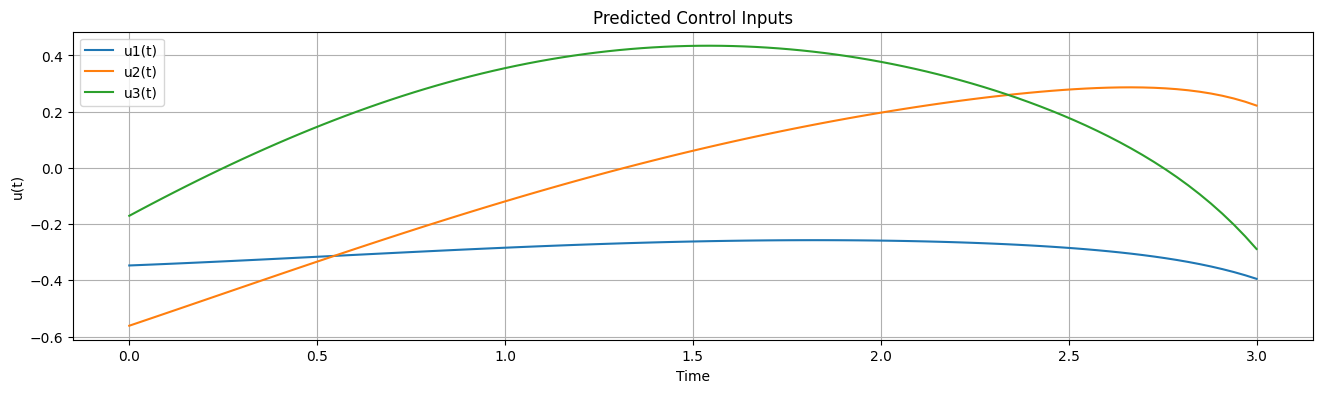

In [10]:

# control inputs
plt.figure(figsize=(16, 4))
for i in range(u_vals.shape[0]): # Iterate over the number of control inputs (m)
    plt.plot(time_points, u_vals[i], label=f'u{i+1}(t)')


plt.title("Predicted Control Inputs")
plt.xlabel("Time")
plt.ylabel("u(t)")
plt.legend()
plt.grid(True)
plt.show()

#**7.Solution State using RK45**

In [11]:
def ode_system(t, x, u_interp):
    """
    Represents the state-space equation dx/dt = Ax + Bu.

    Args:
        t (float): Current time.
        x (np.ndarray): Current state vector (n,).
        u_interp (callable): Interpolation function for the control input u(t).
                             Takes time 't' as input and returns the control vector (m,).

    Returns:
        np.ndarray: The derivative of the state vector dx/dt (n,).
    """
    # Get the control input at the current time t using the interpolation function
    u_t = u_interp(t)

    # Compute the derivative of the state vector: dx/dt = Ax + Bu
    dx_dt = A @ x + B @ u_t

    return dx_dt

In [12]:
from scipy.interpolate import interp1d

# Create separate interpolators for each control input component based on m
u_interps = []
for i in range(m):
    u_interps.append(interp1d(time_points, u_vals[i, :], kind='cubic'))

def u_interp(t):
    # Interpolate each component of the control input u(t) at time t and combine into a vector
    return np.array([interp(t) for interp in u_interps])

In [13]:
from scipy.integrate import solve_ivp

# Time span for the integration
t_span = (time_points[0], time_points[-1])

# Solve the ODE using solve_ivp with 'RK45' method and interpolated control
# Pass u_interp as args to the ode_system function
sol = solve_ivp(ode_system, t_span, x0, method='RK45', t_eval=time_points, args=(u_interp,))

# Extract the state trajectory (transpose to get shape (N, n))
x_trajectory_rk45 = sol.y.T

print("The solution of the system using solve_ivp with RK45 is:")
print(f"State at t={time_points[-1]:.2f}: {x_trajectory_rk45[-1]}")

The solution of the system using solve_ivp with RK45 is:
State at t=3.00: [-2.48984139e-06  2.13300753e-06 -4.18435932e-07  8.30298874e-06
 -3.69675946e-05]


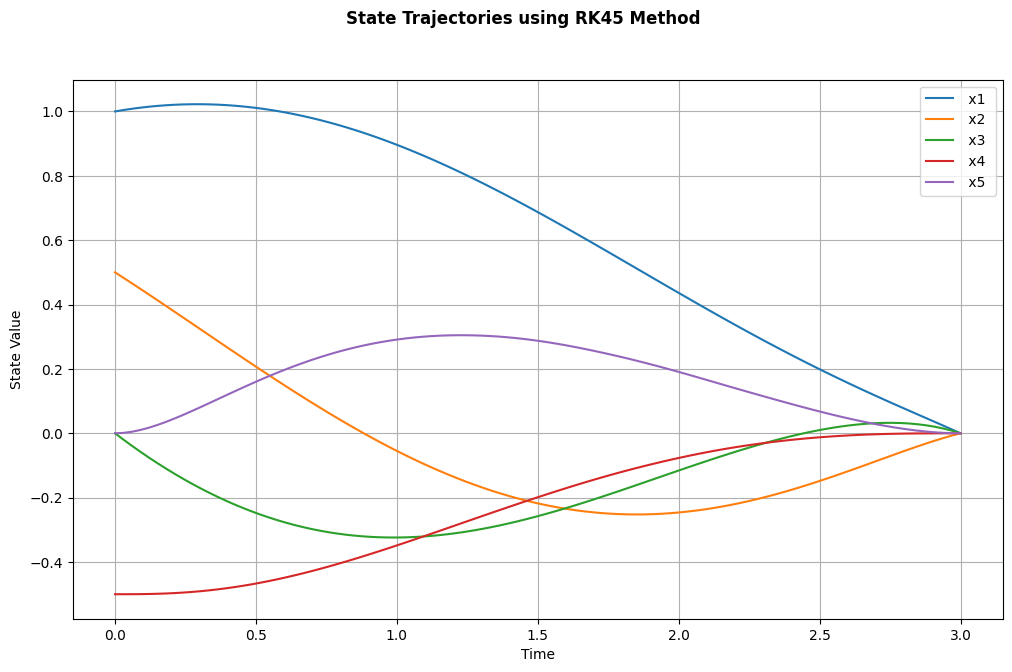

In [14]:
plt.figure(figsize=(12, 7))

# Plot each state variable from both methods
for i in range(n):
    plt.plot(time_points, x_trajectory_rk45[:, i], label=f' x{i+1} ', linestyle='-', color=f'C{i}')

plt.suptitle("State Trajectories using RK45 Method", fontsize=12, fontweight='bold')
plt.xlabel("Time")
plt.ylabel("State Value")
plt.legend()
plt.grid(True)
plt.show()

#**8. solution state using Direct Formula( simpson integral )**

The solution of the system using discrete integration of the formula is:
State at t=3.00: [-8.85257484e-08  5.65168523e-08 -5.88135709e-07  6.42020789e-07
 -4.87958460e-06]


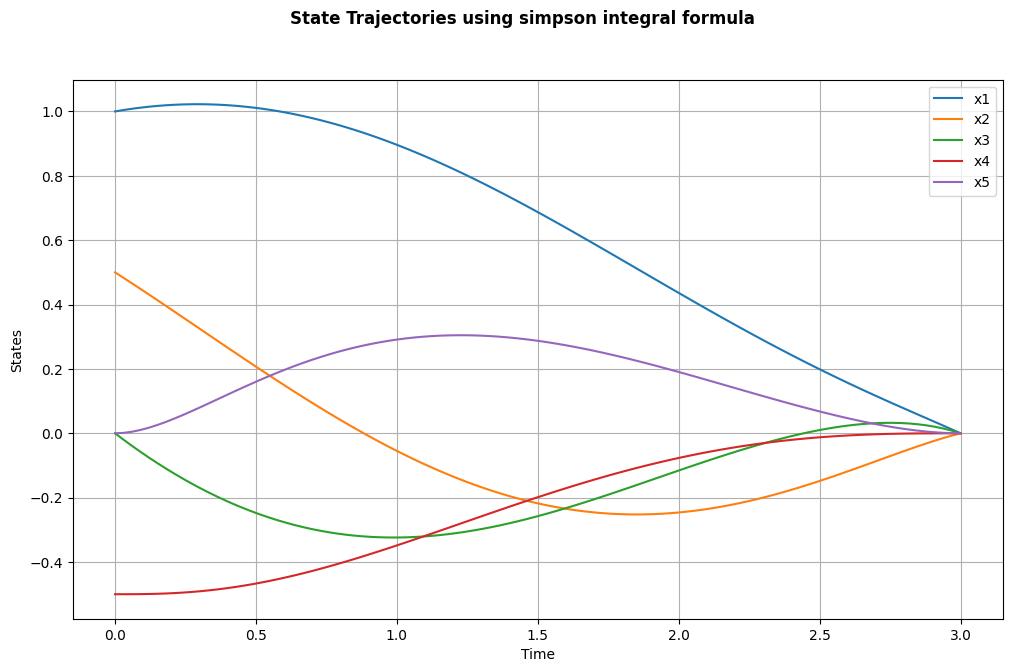

In [15]:
from scipy.integrate import simpson # For numerical integration using Simpson's rule

# Initialize the state trajectory array
x_trajectory_discrete_int = np.zeros((len(time_points), n))

# The initial state is x(0) = x0
x_trajectory_discrete_int[0, :] = x0

# Iterate through the time points to compute x(t) at each point
for i, t in enumerate(time_points):
    if i == 0:
        continue # Already set the initial state

    # Select the time points up to the current time t (inclusive) and the corresponding u_pred values
    time_points_subset = time_points[:i+1]
    u_vals_subset = u_vals[:, :i+1] # u_pred shape is (m, N)

    # Calculate the first part: exp(A*t) * x0
    exp_At = expm(A * t)
    x_part1 = exp_At @ x0

    # Calculate the integrand values at the discrete time points in the subset [T0, t]
    # The integrand is F(s) = exp(A*(t-s)) @ B @ u(s)
    # F(s) is a vector of shape (n,)
    integrand_values = np.zeros((n, len(time_points_subset)))

    for k, s in enumerate(time_points_subset):
        exp_A_ts = expm(A * (t - s))
        u_s = u_vals_subset[:, k].reshape(-1, 1) # u at time s, reshaped to column vector
        integrand_values[:, k] = (exp_A_ts @ B @ u_s).flatten()

    # Numerically integrate the integrand values from T0 to t using Simpson's rule
    # Integrate each component of the vector integrand separately
    integral_result = np.zeros(n)
    for j in range(n): # Integrate for each state variable component
        # integrand_values[j, :] contains the values of the j-th component of the integrand at time_points_subset
        integral_result[j] = simpson(integrand_values[j, :], time_points_subset)

    # The state x(t) is the sum of the two parts
    x_trajectory_discrete_int[i, :] = x_part1 + integral_result

print("The solution of the system using discrete integration of the formula is:")
# Print the trajectory at the final time point as an example
print(f"State at t={time_points[-1]:.2f}: {x_trajectory_discrete_int[-1]}")

z = time_points

plt.figure(figsize=(12, 7))

# Dynamically plot state variables based on the value of n
for i in range(n):
    plt.plot(z, x_trajectory_discrete_int[:, i], label=f'x{i+1}')

plt.suptitle("State Trajectories using simpson integral formula",fontsize=12,fontweight='bold')
plt.xlabel("Time")
plt.ylabel("States")
plt.legend()
plt.grid(True)
plt.show()

#**9.Non-linear sysytem `dx/dt = Ax + Bu + f(x)`**

Enter f(x) as comma-separated sympy expressions for x[0] to x[4] (e.g. '0.01*x[0]**3, 0.02*x[1], 0, 0.03*sin(x[3]), 0'):
0.01*x[0]**3,0.02*x[1],0,0.03*sin(x[3]),0


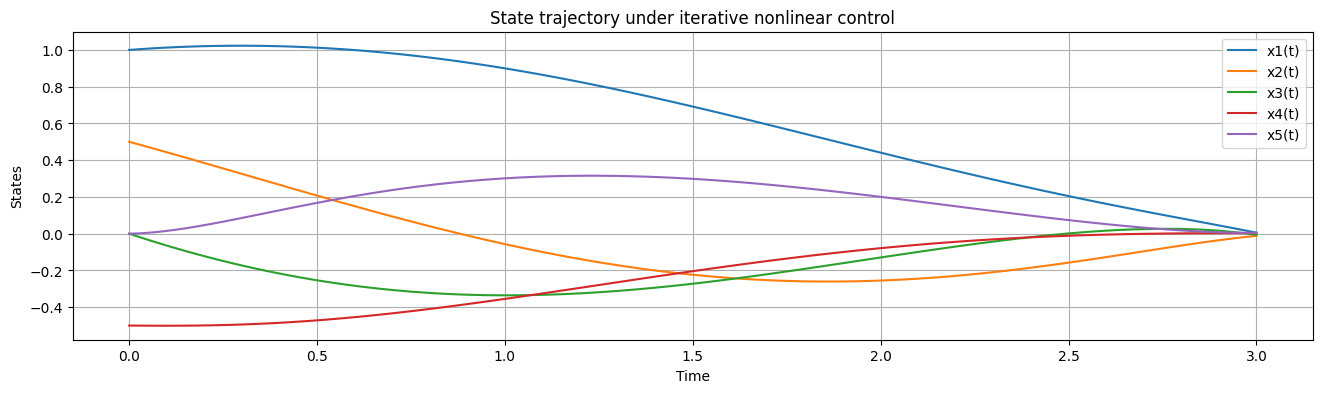

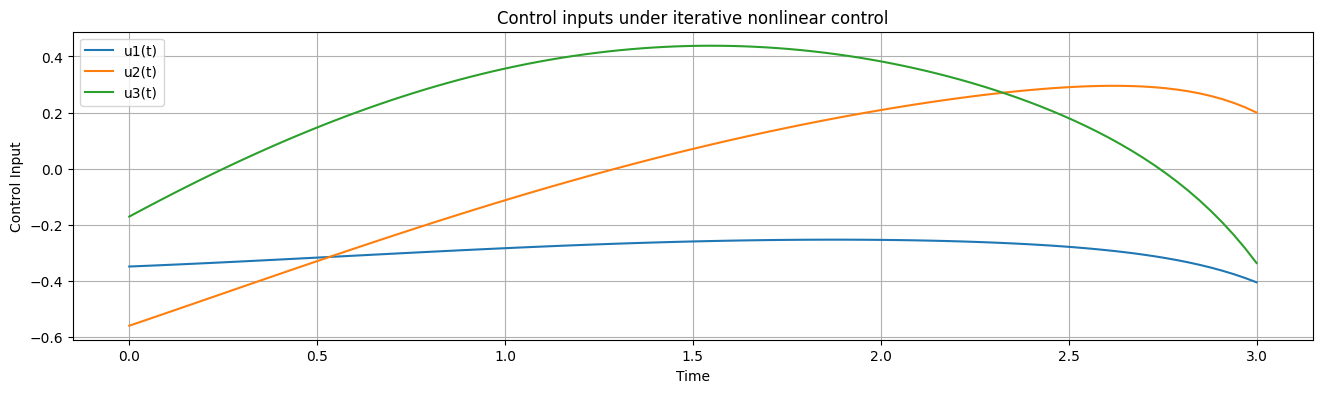

In [21]:
import numpy as np
from scipy.linalg import expm
from scipy.integrate import quad
import matplotlib.pyplot as plt
import sympy as sp

# Define system matrices A and B for a example
# A = np.array([[0, 1, 0, 0],
#               [3, 0, 0, 2],
#               [0, 0, 0, 1],
#               [0, -2, 0, 0]])
# B = np.array([[0, 0],
#               [1, 0],
#               [0, 0],
#               [0, 1]])

# Nonlinear function f(x) so that it satisfy the Lipschitz condition
# def f(x):
#     return np.array([0, 0, 0, 0]) # Ensure f(x) returns a vector of size n
# def f(x):
#     return np.array([
#         0.01 * x[0]**3,
#         0.02*x[1],
#         0,
#         0.03* np.sin(x[3]),
#         0
#     ])


def get_user_function(n_dim):
    fx_strs = input(f"Enter f(x) as comma-separated sympy expressions for x[0] to x[{n_dim-1}] (e.g. '0.01*x[0]**3, 0.02*x[1], 0, 0.03*sin(x[3]), 0'):\n").split(',')

    # To Construct the string for a lambda function that uses numpy indexing
    # To Replace sympy's x[i] with numpy's x[i]
    fx_lambda_str = "lambda x: np.array([" + ", ".join([expr_str.strip().replace('x[', 'x[') for expr_str in fx_strs]) + "])"

    # Evaluate the string to get the actual function
    # Include necessary functions like np.sin, etc. in the evaluation scope
    local_dict = {'np': np, 'sin': np.sin, 'cos': np.cos, 'tan': np.tan,
                  'sinh': np.sinh, 'cosh': np.cosh, 'tanh': np.tanh,
                  'sqrt': np.sqrt, 'exp': np.exp, 'log': np.log, 'log10': np.log10,
                  'pi': np.pi, 'e': np.e, 'abs': np.abs}

    fx_func = eval(fx_lambda_str, local_dict)

    return fx_func


# Get the nonlinear function from user input
f = get_user_function(n)

# Time settings
t0, t1 = T0,T1
t_vals = np.linspace(t0, t1, N)
dt = t_vals[1] - t_vals[0]

# Gramian computation (simplified version for controllable linear system)
def compute_grammian(A, B, t0, t1, N):
    W = np.zeros((A.shape[0], A.shape[0]))
    for i in range(N):
        tau = t0 + i * (t1 - t0) / N
        e_At = expm(A * (t1 - tau))
        W += e_At @ B @ B.T @ e_At.T * dt
    return W

W = compute_grammian(A, B, t0, t1, N)

# Iterative scheme to compute control u^(n)(t)
def compute_control_iteratively(x0, x1, A, B, f, t_vals, W, n_iter=10):
    n_dim = A.shape[0] # Get state dimension
    m_dim = B.shape[1] # Get input dimension

    x_traj = np.zeros((len(t_vals), n_dim))
    x_traj[0] = x0

    u_traj = np.zeros((n_iter, len(t_vals), m_dim)) # To store control inputs for each iteration

    for n in range(n_iter):
        # Define x^n(t) from previous iteration (or initial state if n=0)
        def x_n(t_idx):
            return x_traj[t_idx]

        # Compute nonlinear correction term for the target state
        nonlinear_correction = np.zeros(n_dim)
        for i, tau in enumerate(t_vals):
            e_At = expm(A * (t1 - tau))
            nonlinear_correction += e_At @ f(x_n(i)) * dt

        target_term = x1 - expm(A * (t1 - t0)) @ x0 - nonlinear_correction

        # Compute control u^n(t)
        u_n = []
        W_inv = np.linalg.inv(W)
        for t in t_vals:
            e_AT = expm(A.T * (t1 - t))
            ut = B.T @ e_AT @ W_inv @ target_term
            u_n.append(ut) # To Append the full vector u_t

        u_traj[n] = np.array(u_n) # Store the control input for this iteration

        # Update x^{n+1}(t) using u^n(t)
        x_new = np.zeros_like(x_traj)
        x_new[0] = x0
        for i in range(1, len(t_vals)):
            integral = np.zeros(n_dim)
            for j in range(i):
                tau = t_vals[j]
                e_A = expm(A * (t_vals[i] - tau))
                integral += e_A @ (B @ u_traj[n, j].reshape(-1, 1) + f(x_traj[j]).reshape(-1, 1)).flatten() * dt # Ensure f(x_traj[j]) is also a column vector and flatten the result

            x_new[i] = expm(A * (t_vals[i] - t0)) @ x0 + integral

        x_traj = x_new.copy()

    return t_vals, u_traj[-1], x_traj # Return the control input from the last iteration and the final state trajectory

t_vals, u_final, x_trajectory = compute_control_iteratively(x0, x1, A, B, f, t_vals, W)

# Plot results
plt.figure(figsize=(16, 4))
for i in range(x_trajectory.shape[1]):
    plt.plot(t_vals, x_trajectory[:, i], label=f'x{i+1}(t)')

plt.title('State trajectory under iterative nonlinear control')
plt.xlabel('Time')
plt.ylabel('States')
plt.legend()
plt.grid(True)
plt.show()

# control inputs
plt.figure(figsize=(16, 4))
for i in range(u_final.shape[1]):
    plt.plot(t_vals, u_final[:, i], label=f'u{i+1}(t)')

plt.title('Control inputs under iterative nonlinear control')
plt.xlabel('Time')
plt.ylabel('Control Input')
plt.legend()
plt.grid(True)
plt.show()

#**Tools and Mathematical Techniques:**



1.   **State-space modeling**
2. **Matrix exponentials**
3.**Numerical integration (solve_ivp, quad_vec,Riemann sum)**
4.**Time-discretized control inputs**
5.**Visualization of dynamic systems**


#**✅ Key Takeaways:**
**Shows how control systems behave under user-defined inputs.**

**Allows easy experimentation for different time intervals and inputs.**

**Provides a practical application of Linear System Theory in Python.**



---



> #     >>>>>>>>               **THANK YOU FOR YOUR KIND ATTENTION** >>>>>>

